#Drunkard's Walk (Caminhada do bêbado)

###Modulos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

Função para gerar Matriz de Transição.

In [ ]:
def Gera_MatrizTransicao(direito, dimensao):
    esquerdo = 1 - direito
    MatrizTransicao = np.diag(esquerdo*np.ones(dimensao), k=-1) + np.diag(direito*np.ones(dimensao), k=1) 
    MatrizTransicao[0, :] = 0
    MatrizTransicao[0, 0] = 1
    MatrizTransicao[dimensao, :] = 0
    MatrizTransicao[dimensao, dimensao] = 1
    return MatrizTransicao
X = float(input('Probabilidade de ir para direita: '))
print(f'Probabilidade de ir para esquerda: {1-X:.2f}')
Y = int(input('Posição da casa: '))
bar = int(input('Posição do bar: '))
Matriz_trans = Gera_MatrizTransicao(X,Y)

Probabilidade de ir para direita: 0.50
Probabilidade de ir para esquerda: 0.50
Posição da casa: 10
Posição do bar: 2


###Matriz de Transição

In [ ]:
Matriz_trans

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])



###Forma Canônica

In [ ]:
A = [0, Y]
B = range(1, Y)
P = Gera_MatrizTransicao(X,Y)
Matriz_Identidade = P[np.ix_(A, A)]
Matriz_Absorvente = P[np.ix_(B, A)]
Matriz_Transiente = P[np.ix_(B, B)]
Matriz_nula = np.zeros([len(Matriz_Identidade),len(Matriz_Transiente)])
print("\nMatriz de estado transiente\n")
print(Matriz_Transiente,"\n")
print("\nMatriz Transiente --> Absorvente\n")
print(Matriz_Absorvente,"\n")
print("\nMatriz Nula\n")
print(Matriz_nula)
print("\nMatriz Identidade\n")
print(Matriz_Identidade,"\n")


Matriz de estado transiente

[[0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0. ]] 


Matriz Transiente --> Absorvente

[[0.5 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.5]] 


Matriz Nula

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Matriz Identidade

[[1. 0.]
 [0. 1.]] 



### Matriz Fundamental

In [ ]:
Matriz_indent_fundamental= (np.eye(len(Matriz_Transiente)))
Subtracao = np.subtract(Matriz_indent_fundamental,Matriz_Transiente)
matriz_fundamental = np.linalg.inv(Subtracao)

print("\nMatriz fundamental\n")
np.set_printoptions(suppress = True, precision=3)
print(matriz_fundamental,"\n")

Vetor_t = matriz_fundamental.sum(axis=1)
matriz_b = np.dot(matriz_fundamental,Matriz_Absorvente)
print("\nVetor t\n")
np.set_printoptions(precision=0)
print(Vetor_t,"\n")
np.set_printoptions(suppress = True, precision=3)
print("\nMatriz B\n")
print(matriz_b,"\n")




Matriz fundamental

[[1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
 [1.6 3.2 2.8 2.4 2.  1.6 1.2 0.8 0.4]
 [1.4 2.8 4.2 3.6 3.  2.4 1.8 1.2 0.6]
 [1.2 2.4 3.6 4.8 4.  3.2 2.4 1.6 0.8]
 [1.  2.  3.  4.  5.  4.  3.  2.  1. ]
 [0.8 1.6 2.4 3.2 4.  4.8 3.6 2.4 1.2]
 [0.6 1.2 1.8 2.4 3.  3.6 4.2 2.8 1.4]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 1.6]
 [0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]] 


Vetor t

[ 9. 16. 21. 24. 25. 24. 21. 16.  9.] 


Matriz B

[[0.9 0.1]
 [0.8 0.2]
 [0.7 0.3]
 [0.6 0.4]
 [0.5 0.5]
 [0.4 0.6]
 [0.3 0.7]
 [0.2 0.8]
 [0.1 0.9]] 




### Calculo de Autovalores e Autovetores

In [ ]:
np.set_printoptions(suppress= True,precision=3)
autovalor, autovetor = np.linalg.eig(Matriz_trans.T)
print('\nAutovalores\n')
print(autovalor)
print()

print('\nMatriz de autovetores normalizados\n')
print(autovetor)
print()


Autovalores

[ 1.     1.    -0.951 -0.809 -0.588 -0.309  0.309  0.951  0.809  0.588
  0.   ]


Matriz de autovetores normalizados

[[ 1.     0.    -0.035  0.072  0.112 -0.158  0.282 -0.632 -0.493  0.373
  -0.213]
 [ 0.     0.     0.138 -0.261 -0.357  0.415 -0.39   0.062  0.188 -0.307
   0.426]
 [ 0.     0.    -0.263  0.423  0.42  -0.256 -0.241  0.118  0.305 -0.361
   0.   ]
 [ 0.     0.     0.361 -0.423 -0.136 -0.256  0.241  0.162  0.305 -0.117
  -0.426]
 [ 0.     0.    -0.425  0.261 -0.26   0.415  0.39   0.19   0.188  0.223
  -0.   ]
 [ 0.     0.     0.447 -0.     0.442 -0.     0.     0.2   -0.     0.38
   0.426]
 [ 0.     0.    -0.425 -0.261 -0.26  -0.415 -0.39   0.19  -0.188  0.223
   0.   ]
 [ 0.     0.     0.361  0.423 -0.136  0.256 -0.241  0.162 -0.305 -0.117
  -0.426]
 [ 0.     0.    -0.263 -0.423  0.42   0.256  0.241  0.118 -0.305 -0.361
   0.   ]
 [ 0.     0.     0.138  0.261 -0.357 -0.415  0.39   0.062 -0.188 -0.307
   0.426]
 [ 0.     1.    -0.035 -0.072  0.112  0.158 -0.28

###Decomposição espectral

In [ ]:
np.set_printoptions(suppress= True,precision=3)
print('\n(matriz S)\n')
print(autovetor)
print()

print('\nMatriz Diagonal (matriz Λ)\n')
matrizdiagonal = np.diag(autovalor)
print(matrizdiagonal)
print()

print('\nMatriz de autovetores inversa (Matriz S-¹)\n')
matrizAutovetoresInversa = np.linalg.inv(autovetor)
print(matrizAutovetoresInversa)
print()

print('\nDecomposição Espectral (SΛS-¹)\n')
decomposição_sas = np.matmul(np.matmul(autovetor,matrizdiagonal),np.linalg.inv(autovetor))
print(decomposição_sas)
print()


(matriz S)

[[ 1.     0.    -0.035  0.072  0.112 -0.158  0.282 -0.632 -0.493  0.373
  -0.213]
 [ 0.     0.     0.138 -0.261 -0.357  0.415 -0.39   0.062  0.188 -0.307
   0.426]
 [ 0.     0.    -0.263  0.423  0.42  -0.256 -0.241  0.118  0.305 -0.361
   0.   ]
 [ 0.     0.     0.361 -0.423 -0.136 -0.256  0.241  0.162  0.305 -0.117
  -0.426]
 [ 0.     0.    -0.425  0.261 -0.26   0.415  0.39   0.19   0.188  0.223
  -0.   ]
 [ 0.     0.     0.447 -0.     0.442 -0.     0.     0.2   -0.     0.38
   0.426]
 [ 0.     0.    -0.425 -0.261 -0.26  -0.415 -0.39   0.19  -0.188  0.223
   0.   ]
 [ 0.     0.     0.361  0.423 -0.136  0.256 -0.241  0.162 -0.305 -0.117
  -0.426]
 [ 0.     0.    -0.263 -0.423  0.42   0.256  0.241  0.118 -0.305 -0.361
   0.   ]
 [ 0.     0.     0.138  0.261 -0.357 -0.415  0.39   0.062 -0.188 -0.307
   0.426]
 [ 0.     1.    -0.035 -0.072  0.112  0.158 -0.282 -0.632  0.493  0.373
  -0.213]]


Matriz Diagonal (matriz Λ)

[[ 1.     0.     0.     0.     0.     0.     0.     0. 

# simulação da caminhada do bebado


posição inicial do bebado: 5



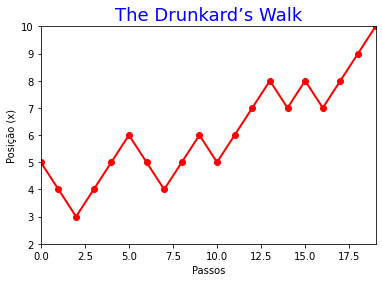


Ele chegou em casa após 19 passos.


In [ ]:
tabela=[]
while True:
    pos_beb = int(input('posição inicial do bebado: '))
    print()
    if (pos_beb>=Y or pos_beb<=0):
        print('Valor Inválido')
    else:
        valor_atual=pos_beb
        tabela.append(valor_atual)
        break
fim = 0
while True:
    fim +=1
    aleatorio = random.random()
    
    if (aleatorio > X):
        valor_atual-=1
        tabela.append(valor_atual)
    else:
        valor_atual+=1
        tabela.append(valor_atual)

    if (valor_atual == Y or valor_atual == bar):
        break


#fig = plt.figure(figsize=(6,3),dpi=200)

plt.title('The Drunkard’s Walk',fontsize = 18, c='b')
plt.plot(tabela,c='r', lw=2, ls='-',marker='o')
plt.axis([0,fim,bar,Y])
plt.xlabel("Passos",fontsize = 10)
plt.ylabel("Posição (x)",fontsize = 10)
plt.show()
print()
passos = 0
for i in tabela:
  passos += 1
if tabela[-1] == bar:
  print(f'Ele chegou no bar após {passos-1} passos.') 
else:
  print(f'Ele chegou em casa após {passos-1} passos.') 